# DS-301 Final Project - Age Detection

#### Oliver Li, Dustin Huang, Kate Nazzaro

### Import Data

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('drive/MyDrive/cleaned_age_gender_ethnicity_data.csv')

In [ ]:
data.head(10)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
5,1,2,0,20161220144957407.jpg.chip.jpg,195 198 200 200 198 198 199 199 198 197 197 19...
6,1,2,0,20161220145040127.jpg.chip.jpg,208 216 217 219 222 223 222 221 220 220 221 22...
7,1,2,0,20170109191125532.jpg.chip.jpg,99 142 169 177 179 181 183 186 187 186 191 190...
8,1,2,0,20161219222749039.jpg.chip.jpg,127 127 133 140 143 148 152 157 160 165 172 17...
9,1,2,0,20170109191209991.jpg.chip.jpg,199 211 211 214 216 216 219 221 222 224 219 21...


(-0.5, 47.5, 47.5, -0.5)

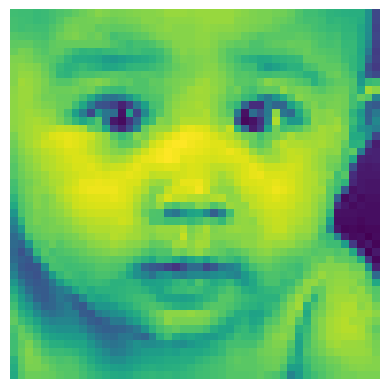

In [ ]:
import keras
import json
import sys
import tensorflow as tf
from keras.layers import Input
import numpy as np
import argparse
#from keras_applications.resnext import ResNeXt50
#from keras.utils.data_utils import get_file
#import face_recognition
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

df1= pd.DataFrame(data)
df1['pixels'] = df1.pixels.apply(lambda x: np.reshape(np.array(x.split(' '),dtype='float32'),(48,48)))
df1['pixels']= df1['pixels']/255
im = df1['pixels'][0]
im
plt.imshow(im)
plt.axis('off')

(-0.5, 47.5, 47.5, -0.5)

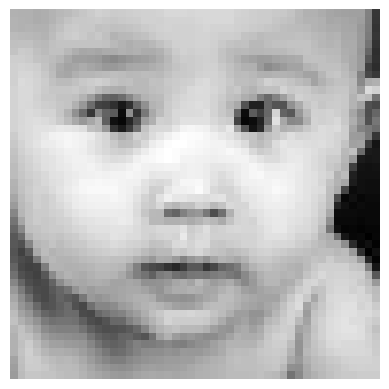

In [ ]:
import keras
import json
import sys
import tensorflow as tf
from keras.layers import Input
import numpy as np
import argparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

df1= pd.DataFrame(data)
df1['pixels'] = df1.pixels.apply(lambda x: np.reshape(np.array(x.split(' '),dtype='float32'),(48,48)))
df1['pixels']= df1['pixels']/255
im = df1['pixels'][0]
im
plt.imshow(im, cmap='gray')
plt.axis('off')

In [ ]:
X = np.zeros(shape=(23705,48,48))
for i in range(len(df1["pixels"])):
    X[i] = df1["pixels"][i]
X.dtype

#Age
ag = df1['age']
ag = ag.astype(float)
ag = np.array(ag)
ag.shape

(23705,)

In [ ]:
X.shape

(23705, 48, 48)

In [ ]:
#Gender

g = df1['gender']
g = np.array(g)
g.shape
#(23705,)
labels_f = []

i = 0
#while i < len(ag):
#  label = []
#  label.append([ag[i]])
#  label.append([g[i]])
#  labels_f.append(label)
#  i+=1

while i < len(ag):
  label = []
  label.append([g[i]])
  label.append([ag[i]])
  labels_f.append(label)
  i+=1

In [ ]:
labels_f = np.array(labels_f)
labels_f.shape

(23705, 2, 1)

In [ ]:
#Splitting the data taking data set
import tensorflow as tf
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(X, labels_f, test_size=0.25)
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)

(5927, 48, 48)
(17778, 48, 48)
(5927, 2, 1)
(17778, 2, 1)


In [ ]:
Y_train_2 = [Y_train[:,1],Y_train[:,0]]
Y_test_2 = [Y_test[:,1],Y_test[:,0]]

### Transfer Learning Models

In [ ]:
# for keras
from classification_models.keras import Classifiers

# for tensorflow keras
from classification_models.tfkeras import Classifiers

Classifiers.models_names()

['resnet18',
 'resnet34',
 'resnet50',
 'resnet101',
 'resnet152',
 'seresnet18',
 'seresnet34',
 'seresnet50',
 'seresnet101',
 'seresnet152',
 'seresnext50',
 'seresnext101',
 'senet154',
 'resnet50v2',
 'resnet101v2',
 'resnet152v2',
 'resnext50',
 'resnext101',
 'vgg16',
 'vgg19',
 'densenet121',
 'densenet169',
 'densenet201',
 'inceptionresnetv2',
 'inceptionv3',
 'xception',
 'nasnetlarge',
 'nasnetmobile',
 'mobilenet',
 'mobilenetv2']

In [ ]:
SeResNeXT, preprocess_input = Classifiers.get('seresnext50')
model = SeResNeXT(include_top = False, input_shape=(224, 224, 3), weights='imagenet')

104679448/104679448 [==============================] - 2s 0us/step


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/cleaned_age_gender_ethnicity_data.csv')

In [ ]:
#from tensorflow.keras.applications import SEResNeXt50

# Load SE-ResNeXt model pre-trained on ImageNet
SeResNeXT, preprocess_input = Classifiers.get('seresnext50')
#base_model = SeResNeXT(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model = SeResNeXT(include_top=False, input_shape=(48, 48, 3), weights='imagenet')

#base_model = SEResNeXt50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from classification_models.keras import Classifiers
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/cleaned_age_gender_ethnicity_data.csv')

### Transfer Learning - ResNet50 (using Imagenet)

In [ ]:
# train model using fit
resnet_history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(X_test) // batch_size)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.applications import ResNet50
from keras.layers import Input, GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, array_to_img

data = pd.read_csv('/content/drive/MyDrive/cleaned_age_gender_ethnicity_data.csv')

labels_f = data[['gender', 'age']].to_numpy()

X_train, X_test, labels_train, labels_test = train_test_split(data['pixels'], labels_f, test_size=0.25, random_state=42)

# define ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# add a custom head for age and gender prediction
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='linear')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

In [ ]:
# data-augmentation/normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# define custom data generator for training
def custom_generator(X, Y, batch_size):
    while True:
        for i in range(0, len(X), batch_size):
            batch_X = X[i:i+batch_size]
            batch_Y = Y[i:i+batch_size]

            images = []
            for x in batch_X:
                img = img_to_array(array_to_img(np.array(x.split(' '), dtype='float32').reshape(48, 48, 1) / 255.).convert('RGB').resize((224, 224)))
                images.append(img)

            yield np.array(images), np.array(batch_Y)

# create generators
batch_size = 32
train_generator = custom_generator(X_train, labels_train, batch_size)
validation_generator = custom_generator(X_test, labels_test, batch_size)

In [ ]:
# train model using fit
model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(X_test) // batch_size)

<ipython-input-3-43a1bd8cbb9b>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/5
555/555 [==============================] - 268s 392ms/step - loss: 404.1044 - mae: 16.7853 - val_loss: 400.4182 - val_mae: 16.8412
Epoch 2/5
555/555 [==============================] - 220s 394ms/step - loss: 391.0774 - mae: 16.5883 - val_loss: 410.1242 - val_mae: 16.6313
Epoch 3/5
555/555 [==============================] - 217s 391ms/step - loss: 386.2115 - mae: 16.5403 - val_loss: 393.6816 - val_mae: 16.6378
Epoch 4/5
555/555 [==============================] - 217s 391ms/step - loss: 383.0563 - mae: 16.5051 - val_loss: 419.8573 - val_mae: 16.8030
Epoch 5/5
555/555 [==============================] - 217s 391ms/step - loss: 380.6327 - mae: 16.4820 - val_loss: 392.2797 - val_mae: 16.6711


In [ ]:
model.save('age_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# train model using fit_generator
history = model.fit(train_generator,
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=len(X_test) // batch_size)

Epoch 1/30
555/555 [==============================] - 217s 391ms/step - loss: 378.8625 - mae: 16.4709 - val_loss: 394.7930 - val_mae: 16.6995
Epoch 2/30
555/555 [==============================] - 216s 390ms/step - loss: 377.4387 - mae: 16.4534 - val_loss: 390.8021 - val_mae: 16.6545
Epoch 3/30
555/555 [==============================] - 217s 392ms/step - loss: 376.8597 - mae: 16.4499 - val_loss: 393.5500 - val_mae: 16.5013
Epoch 4/30
555/555 [==============================] - 217s 391ms/step - loss: 376.7376 - mae: 16.4508 - val_loss: 396.4897 - val_mae: 16.5022
Epoch 5/30
555/555 [==============================] - 216s 390ms/step - loss: 375.5645 - mae: 16.4425 - val_loss: 390.5752 - val_mae: 16.5261
Epoch 6/30
555/555 [==============================] - 216s 390ms/step - loss: 374.7212 - mae: 16.4411 - val_loss: 389.6338 - val_mae: 16.5628
Epoch 7/30
555/555 [==============================] - 216s 390ms/step - loss: 373.9238 - mae: 16.4337 - val_loss: 392.5784 - val_mae: 16.6924
Epoch 

KeyboardInterrupt: ignored

In [ ]:
model.save('age_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Transfer Learning - ResNet50 (using imagenet) with dropout

In [ ]:
from keras.layers import Dropout
from keras import backend as K

# define ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='linear')(x)

model = Model(inputs=base_model.input, outputs=predictions)

def custom_squared_difference(y_true, y_pred):
    return K.square(y_true - y_pred)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
# train model using fit
model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(X_test) // batch_size)

Epoch 1/5
555/555 [==============================] - 249s 394ms/step - loss: 416.4062 - mae: 16.8432 - val_loss: 491.2059 - val_mae: 16.9182
Epoch 2/5
555/555 [==============================] - 216s 390ms/step - loss: 402.6678 - mae: 16.6604 - val_loss: 419.2639 - val_mae: 16.6202
Epoch 3/5
555/555 [==============================] - 217s 391ms/step - loss: 397.0868 - mae: 16.5702 - val_loss: 438.3414 - val_mae: 16.5449
Epoch 4/5
555/555 [==============================] - 216s 390ms/step - loss: 394.6987 - mae: 16.5426 - val_loss: 434.5110 - val_mae: 16.4763
Epoch 5/5
555/555 [==============================] - 217s 390ms/step - loss: 391.9292 - mae: 16.5184 - val_loss: 401.4958 - val_mae: 16.6029


In [ ]:
model.save('age_prediction_model_resnet50_dropout.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.layers import Dropout
from keras import backend as K
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.applications import ResNet50
from keras.layers import Input, GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, array_to_img

data = pd.read_csv('/content/drive/MyDrive/cleaned_age_gender_ethnicity_data.csv')

labels_f = data[['gender', 'age']].to_numpy()

X_train, X_test, labels_train, labels_test = train_test_split(data['pixels'], labels_f, test_size=0.25, random_state=42)

# define ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='linear')(x)

model = Model(inputs=base_model.input, outputs=predictions)

def custom_squared_difference(y_true, y_pred):
    return K.square(y_true - y_pred)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
# data-augmentation/normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# define custom data generator for training
def custom_generator(X, Y, batch_size):
    while True:
        for i in range(0, len(X), batch_size):
            batch_X = X[i:i+batch_size]
            batch_Y = Y[i:i+batch_size]

            images = []
            for x in batch_X:
                img = img_to_array(array_to_img(np.array(x.split(' '), dtype='float32').reshape(48, 48, 1) / 255.).convert('RGB').resize((224, 224)))
                images.append(img)

            yield np.array(images), np.array(batch_Y)

# create generators
batch_size = 32
train_generator = custom_generator(X_train, labels_train, batch_size)
validation_generator = custom_generator(X_test, labels_test, batch_size)

In [ ]:
# train model using fit
model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(X_test) // batch_size)

In [ ]:
model.save('age_prediction_model_resnet50_dropout_morph.h5')

### Transfer Learning - SE-ResNet50 (using Imagenet)

In [ ]:
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-2_7zm4md
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/classification_models.git /tmp/pip-req-build-2_7zm4md
  Resolved https://github.com/qubvel/classification_models.git to commit a0f006e05485a34ccf871c421279864b0ccd220b
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.6 MB/s eta 0:00:00
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-py3-none-any.whl size=20026 sha256=198018e775db44de2b265d58fd8e392776565a148df977966cb2f2d6de0791a6
  Stored in directory: /tmp/pip-ephem-wheel-cache-ek5cn_05/wheels/f5/13/cb/b1dbd79043c5a389742e422859b0b663adcd7b5c220928c339
Successfully built image-classifiers


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Input, GlobalAveragePooling2D, Dense
from keras.models import Model
from classification_models.keras import Classifiers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, array_to_img
from keras.callbacks import ModelCheckpoint

data = pd.read_csv('/content/drive/MyDrive/cleaned_age_gender_ethnicity_data.csv')

labels_f = data[['gender', 'age']].to_numpy()

X_train, X_test, labels_train, labels_test = train_test_split(data['pixels'], labels_f, test_size=0.25, random_state=42)

# define SE-ResNet50 model
SeResNeXT, preprocess_input = Classifiers.get('seresnext50')
base_model = SeResNeXT(include_top=False, input_shape=(224, 224, 3), weights='imagenet')

# add a custom head for age and gender prediction
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='linear')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

In [ ]:
# data-augmentation/normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# define custom data generator for training
def custom_generator(X, Y, batch_size):
    while True:
        for i in range(0, len(X), batch_size):
            batch_X = X[i:i+batch_size]
            batch_Y = Y[i:i+batch_size]

            images = []
            for x in batch_X:
                img = img_to_array(array_to_img(np.array(x.split(' '), dtype='float32').reshape(48, 48, 1) / 255.).convert('RGB').resize((224, 224)))
                images.append(img)

            yield np.array(images), np.array(batch_Y)

# create generators
batch_size = 32
train_generator = custom_generator(X_train, labels_train, batch_size)
validation_generator = custom_generator(X_test, labels_test, batch_size)

In [ ]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# train model using fit_generator
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(X_test) // batch_size,
    callbacks=[checkpoint])

Epoch 1/5
555/555 [==============================] - ETA: 0s - loss: 400.6048 - mae: 16.7173 - accuracy: 0.2618

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


555/555 [==============================] - 641s 867ms/step - loss: 400.6048 - mae: 16.7173 - accuracy: 0.2618 - val_loss: 393.3748 - val_mae: 16.7603 - val_accuracy: 0.2620
Epoch 2/5
555/555 [==============================] - 474s 849ms/step - loss: 387.9983 - mae: 16.5454 - accuracy: 0.2621 - val_loss: 393.7970 - val_mae: 16.6642 - val_accuracy: 0.2620
Epoch 3/5
555/555 [==============================] - 482s 869ms/step - loss: 385.0050 - mae: 16.5170 - accuracy: 0.2617 - val_loss: 389.7150 - val_mae: 16.6776 - val_accuracy: 0.2618
Epoch 4/5
555/555 [==============================] - 478s 861ms/step - loss: 382.8106 - mae: 16.4893 - accuracy: 0.2616 - val_loss: 401.8452 - val_mae: 16.7786 - val_accuracy: 0.2622
Epoch 5/5
555/555 [==============================] - 478s 861ms/step - loss: 379.2529 - mae: 16.4569 - accuracy: 0.2616 - val_loss: 391.4598 - val_mae: 16.7244 - val_accuracy: 0.2614


In [ ]:
model.save('age_prediction_model_seresnet50_dropout.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


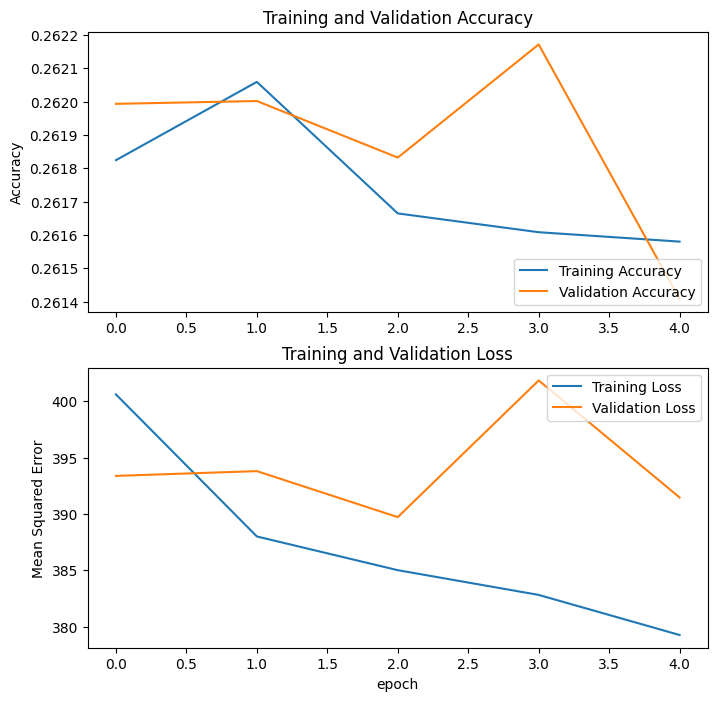

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Mean Squared Error')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

##### SE-ResNet50 (using Imagenet) - added top layers

In [ ]:
# define SE-ResNet50 model
SeResNeXT, preprocess_input = Classifiers.get('seresnext50')
base_model = SeResNeXT(include_top=False, input_shape=(224, 224, 3), weights='imagenet')

# add a custom head for age and gender prediction
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='linear')(x)

model2 = Model(inputs=base_model.input, outputs=predictions)

model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

In [ ]:
checkpoint2 = ModelCheckpoint('se2_best_model.h5', monitor='val_loss', save_best_only=True)

# train model using fit_generator
history2 = model2.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(X_test) // batch_size,
    callbacks=[checkpoint])

Epoch 1/5
555/555 [==============================] - 636s 894ms/step - loss: 400.7510 - mae: 16.7117 - accuracy: 0.2621 - val_loss: 394.7348 - val_mae: 16.7339 - val_accuracy: 0.2621
Epoch 2/5
555/555 [==============================] - ETA: 0s - loss: 388.4685 - mae: 16.5412 - accuracy: 0.2621

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


555/555 [==============================] - 489s 882ms/step - loss: 388.4685 - mae: 16.5412 - accuracy: 0.2621 - val_loss: 389.3619 - val_mae: 16.6624 - val_accuracy: 0.2621
Epoch 3/5
555/555 [==============================] - 485s 874ms/step - loss: 384.2890 - mae: 16.4955 - accuracy: 0.2623 - val_loss: 391.0681 - val_mae: 16.5379 - val_accuracy: 0.2616
Epoch 4/5
555/555 [==============================] - 475s 857ms/step - loss: 382.3763 - mae: 16.4794 - accuracy: 0.2621 - val_loss: 394.8570 - val_mae: 16.5227 - val_accuracy: 0.2622
Epoch 5/5
555/555 [==============================] - 475s 856ms/step - loss: 380.6847 - mae: 16.4698 - accuracy: 0.2612 - val_loss: 407.3505 - val_mae: 16.4669 - val_accuracy: 0.2617


In [ ]:
model.save('age_prediction_model_seresnet50_dropout_3top.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


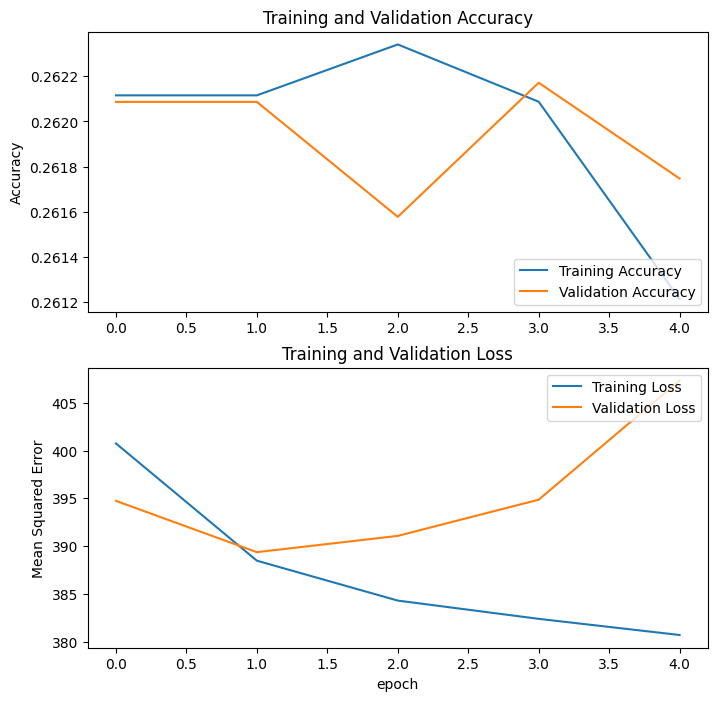

In [ ]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc2, label='Training Accuracy')
plt.plot(val_acc2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss2, label='Training Loss')
plt.plot(val_loss2, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Mean Squared Error')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

##### SE-ResNet50 (using Imagenet) - unfreeze ten

In [ ]:
len(base_model.layers)

1327

In [ ]:
# define SE-ResNet50 model
SeResNeXT, preprocess_input = Classifiers.get('seresnext50')
base_model = SeResNeXT(include_top=False, input_shape=(224, 224, 3), weights='imagenet')

# unfreeze last ten layers
for layer in base_model.layers[:-10]:
    layer.trainable = False

# add a custom head for age and gender prediction
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='linear')(x)

model3 = Model(inputs=base_model.input, outputs=predictions)

model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy'])

In [ ]:
checkpoint3 = ModelCheckpoint('se3_best_model.h5', monitor='val_loss', save_best_only=True)

# train model using fit_generator
history3 = model3.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(X_test) // batch_size,
    callbacks=[checkpoint3])

Epoch 1/5
555/555 [==============================] - ETA: 0s - loss: 6325.3755 - mae: 36.5472 - accuracy: 0.2637

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


555/555 [==============================] - 173s 272ms/step - loss: 6325.3755 - mae: 36.5472 - accuracy: 0.2637 - val_loss: 685.3890 - val_mae: 21.0759 - val_accuracy: 0.2575
Epoch 2/5
555/555 [==============================] - 144s 260ms/step - loss: 731.1276 - mae: 21.3410 - accuracy: 0.2583 - val_loss: 659.8976 - val_mae: 19.0306 - val_accuracy: 0.2348
Epoch 3/5
555/555 [==============================] - 144s 260ms/step - loss: 732.7241 - mae: 21.4239 - accuracy: 0.2536 - val_loss: 560.4985 - val_mae: 19.0305 - val_accuracy: 0.2588
Epoch 4/5
555/555 [==============================] - 133s 240ms/step - loss: 811.9046 - mae: 22.5217 - accuracy: 0.2523 - val_loss: 1082.1479 - val_mae: 25.3004 - val_accuracy: 0.2364
Epoch 5/5
555/555 [==============================] - 133s 240ms/step - loss: 1009.2265 - mae: 24.2714 - accuracy: 0.2526 - val_loss: 904.8233 - val_mae: 25.7974 - val_accuracy: 0.2663


In [ ]:
# train model using fit_generator
history3_2 = model3.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(X_test) // batch_size,
    callbacks=[checkpoint3])

Epoch 1/10
555/555 [==============================] - ETA: 0s - loss: 786.6011 - mae: 22.3176 - accuracy: 0.2532

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


555/555 [==============================] - 144s 260ms/step - loss: 786.6011 - mae: 22.3176 - accuracy: 0.2532 - val_loss: 551.5776 - val_mae: 20.0216 - val_accuracy: 0.2643
Epoch 2/10
555/555 [==============================] - 142s 256ms/step - loss: 921.6432 - mae: 23.2977 - accuracy: 0.2549 - val_loss: 678.3275 - val_mae: 22.4704 - val_accuracy: 0.2641
Epoch 3/10
555/555 [==============================] - 142s 257ms/step - loss: 652.1600 - mae: 20.5071 - accuracy: 0.2507 - val_loss: 682.0007 - val_mae: 22.5330 - val_accuracy: 0.2642
Epoch 4/10
555/555 [==============================] - 142s 256ms/step - loss: 737.8954 - mae: 21.3343 - accuracy: 0.2537 - val_loss: 630.8306 - val_mae: 18.3003 - val_accuracy: 0.2243
Epoch 5/10
555/555 [==============================] - 144s 260ms/step - loss: 636.6162 - mae: 20.2669 - accuracy: 0.2523 - val_loss: 546.5370 - val_mae: 17.5207 - val_accuracy: 0.2415
Epoch 6/10
555/555 [==============================] - 133s 240ms/step - loss: 639.7837 - ma

In [ ]:
model.save('age_prediction_model_seresnet50_dropout_unfrozen10.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


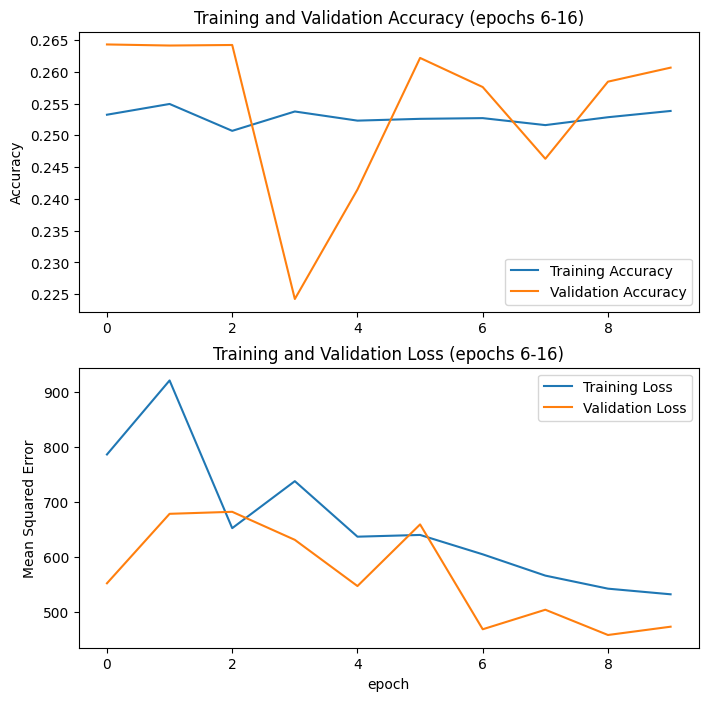

In [ ]:
acc3_2 = history3_2.history['accuracy']
val_acc3_2 = history3_2.history['val_accuracy']

loss3_2 = history3_2.history['loss']
val_loss3_2 = history3_2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc3_2, label='Training Accuracy')
plt.plot(val_acc3_2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy (epochs 6-16)')

plt.subplot(2, 1, 2)
plt.plot(loss3_2, label='Training Loss')
plt.plot(val_loss3_2, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Mean Squared Error')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss (epochs 6-16)')
plt.xlabel('epoch')
plt.show()